In [ ]:
#Author Cheolhong Ahn

from googletrans import Translator
from textblob import TextBlob
import tweepy
from wordcloud import WordCloud
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re
import plotly.express as px

#cleans text for better analysis
def textClean(text):
  text = re.sub(r'@[A-Za-z0-9]+','', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r':','', text)
  text = re.sub(r'RT[\s]+','',text)
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'\n', '',text)
  return text

def polarityCat(polarity):
  if polarity == 0:
    return "neutral"
  elif polarity > 0:
    return "positive"
  else:
    return "negative"


#converts language choice to format that is used in tweepy
def languageChoice(lang):
  if lang == "English":
    return "en"
  elif lang == "Korean":
    return "ko"
  elif lang == "Chinese-Simplified":
    return "zh-cn"
  elif lang == "Chinese-Traditional":
    return "zh-tw"
  elif lang == "French":
    return "fr"
  elif lang == "Italian":
    return "it"
  elif lang == "Japanese":
    return "ja"
  elif lang == "Russian":
    return "ru"
  elif lang == "Spanish":
    return "es"
  else:
    return "en"


# change language format for translate
def Gtranslate(lang):
  if lang == "zh-tw":
    return "zh-TW"
  elif lang == "zh-cn":
    return "zh-CN"
  else:return lang


#@markdown #Search Twitter
translator = Translator()

api_key = 'J3TfgTQzgUDPaSQYoUYmDOT7U'
api_secret= 'Jtr2MsRppKeMwzi7lv6UOhxHZZYazFQZSNlm8kmRHV7gCCwoEq'
access_token = '1323068856907300864-slZ8jKtT6k38SmOYpFAxlMewyWoKlu'
access_token_secret= 'NRRBZklN7QQvhlLvA7CMQH9sMSzgHN46kbzZ1vmbrZ5Us'

twitter = tweepy.OAuthHandler(api_key, api_secret)
api = tweepy.API(twitter)

search = '' #@param {type:"string"}
showCount = 100 #@param {type:"integer"}
language = 'English' #@param["English", "Korean", "Chinese-Simplified", "Chinese-Traditional", "French" ,"Italian" ,"Japanese","Russian", "Spanish" ]
language = languageChoice(language)

searchLang = Gtranslate(language)


#google translate API currently has bug so below feature will not work untill that bug is fixed.
#search = translator.translate(search, , dest = searchLang)


corpus_tweets = api.search(search, count = showCount, lang = language, tweet_mode="extended")



df = pd.DataFrame([tweet.full_text for tweet in corpus_tweets], columns = ['Tweets'])
df['Tweets'] = df['Tweets'].apply(textClean)
df =df.drop_duplicates()   #Dropping duplicates
df['Polarity'] = df['Tweets'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['Subjectivity'] = df['Tweets'].apply(lambda text: TextBlob(text).sentiment.subjectivity)
df['PolarityCategory'] = df['Polarity'].apply(polarityCat)
df



,Tweets,Polarity,Subjectivity,PolarityCategory
0,Glitterpedia Eye Shadow |Palette|Eye Makeup|Po...,0.000000,0.000000,neutral
1,"AMTS EyeShadow Makeup Palette, Matte Shimmer M...",-0.025000,0.200000,negative
2,Erborian BB Cream with Ginseng - Lightweight B...,0.000000,0.000000,neutral
3,KOREAN MAKEUP X ASIAN FISHINGa thread for edtw...,0.000000,0.000000,neutral
5,i mean i have a pain disorder and bpd so weed...,-0.056250,0.443750,negative
...,...,...,...,...
91,🌼 up! bili na kayo~wts lfb phauthentic korean ...,0.166667,0.733333,positive
95,_India A good skincare routine is the secret t...,0.537500,0.825000,positive
96,OMG!! my Oppa! Saranghaeyo Jungkook! Anneongha...,0.000000,0.000000,neutral
97,"Omg, I'm so dumb... It's not just red cheeks m...",-0.125000,0.416667,negative


In [ ]:
#@markdown #Export as .csv
filename = "abc" #@param{type:"string"}

if filename == "default":
  filename = search+'.csv'
else:
  filename = filename+'.csv'

df.to_csv(filename)

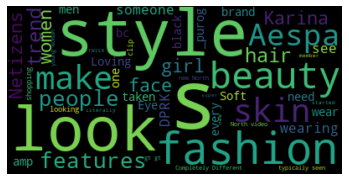

In [ ]:
#wordcloud without the search word (as obviously they would be the biggest)
#@markdown #Word Cloud Generator.
#@markdown ---
#@markdown ####Optional:

import_csv = "" #@param {type:"string"}
if import_csv != "":
  import_csv = import_csv + ".csv"
  df = pd.read_csv(import_csv)
  print(df)
  language = 'English' #@param["English", "Korean", "Chinese-Simplified", "Chinese-Traditional", "French" ,"Italian" ,"Japanese","Russian", "Spanish" ]
  language = languageChoice(language)

tweets = ' '.join([tweet for tweet in df['Tweets']])

if import_csv == "" :
  lst =  search.split()
  for i in lst:
    tweets = re.sub(i,'', tweets, flags=re.IGNORECASE)
#@markdown ---
#@markdown ####number of words:
word_count = 20  #@param {type: "integer"}


if language != "en":
  if language == "ko":
    wordcloud = WordCloud(max_words=50, font_path='/usr/share/fonts/truetype/NotoSansKR-Medium.otf').generate(tweets)
  elif language == "zh-tw":
    wordcloud = WordCloud(max_words=50, font_path='/usr/share/fonts/truetype/NotoSansTC-Medium.otf').generate(tweets)
  elif language == "zh-cn":
    wordcloud = WordCloud(max_words=50, font_path='/usr/share/fonts/truetype/NotoSansSC-Medium.otf').generate(tweets)
  elif language == "ja":
    wordcloud = WordCloud(max_words=50, font_path='/usr/share/fonts/truetype/NotoSansJP-Medium.otf').generate(tweets)
  else:
    wordcloud = WordCloud(max_words=50).generate(tweets)

else:
  wordcloud = WordCloud(max_words=50).generate(tweets)



plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

(-1.0, 1.0)

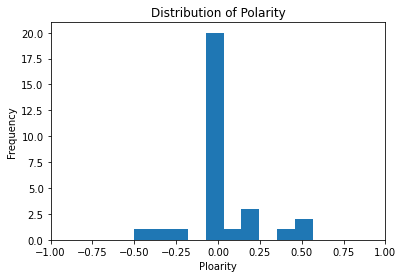

In [ ]:
#histogram using matplotlib

#@markdown #Histogram of polarity
plt.title('Distribution of Polarity')
plt.hist(df['Polarity'])
plt.xlabel("Ploarity")
plt.ylabel("Frequency")
plt.xlim((-1, 1))

In [ ]:
#Pie chart using plotly showing the distribution
#@markdown #Pie chart of polarity

GraphTitle= "Korean Makeup Polarity on Twitter" #@param {type:"string"}
fig = px.pie(df, names='PolarityCategory', color = 'PolarityCategory', title="", )
fig.show()

In [ ]:
#@markdown #Download fonts

!wget -O Korean.zip https://fonts.google.com/download?family=Noto%20Sans%20KR
!unzip "Korean.zip"
!mv NotoSansKR-Medium.otf /usr/share/fonts/truetype/

!wget -O TChinese.zip https://fonts.google.com/download?family=Noto%20Sans%20TC
!unzip "TChinese.zip"
!mv NotoSansTC-Medium.otf /usr/share/fonts/truetype/

!wget -O SChinese.zip https://fonts.google.com/download?family=Noto%20Sans%20SC
!unzip "SChinese.zip"
!mv NotoSansSC-Medium.otf /usr/share/fonts/truetype/


!wget -O Japanese.zip https://fonts.google.com/download?family=Noto%20Sans%20JP
!unzip "Japanese.zip"
!mv NotoSansJP-Medium.otf /usr/share/fonts/truetype/

In [ ]:
!pip install googletrans==3.1.0a0
!pip install textblob
!pip install tweepy
!pip install wordcloud
!pip install pandas
!pip install matplotlib
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 229 kB/s 
     |████████████████████████████████| 1.4 MB 8.3 MB/s 
     |████████████████████████████████| 42 kB 488 kB/s 
     |████████████████████████████████| 53 kB 611 kB/s 
     |████████████████████████████████| 65 kB 1.6 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=95eeacde3e5c93b70a60e0ef234b718c553ee7b505b20c9bf956e33854983d66
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: htt